# Plot the landscape: ABM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import random

## Histograms and corr matrix

In [8]:
# open the file
accepted_params = pd.read_excel('optimizer_outputs_resilience.xlsx').drop(["run_number", "fit"], axis=1)

<AxesSubplot:>

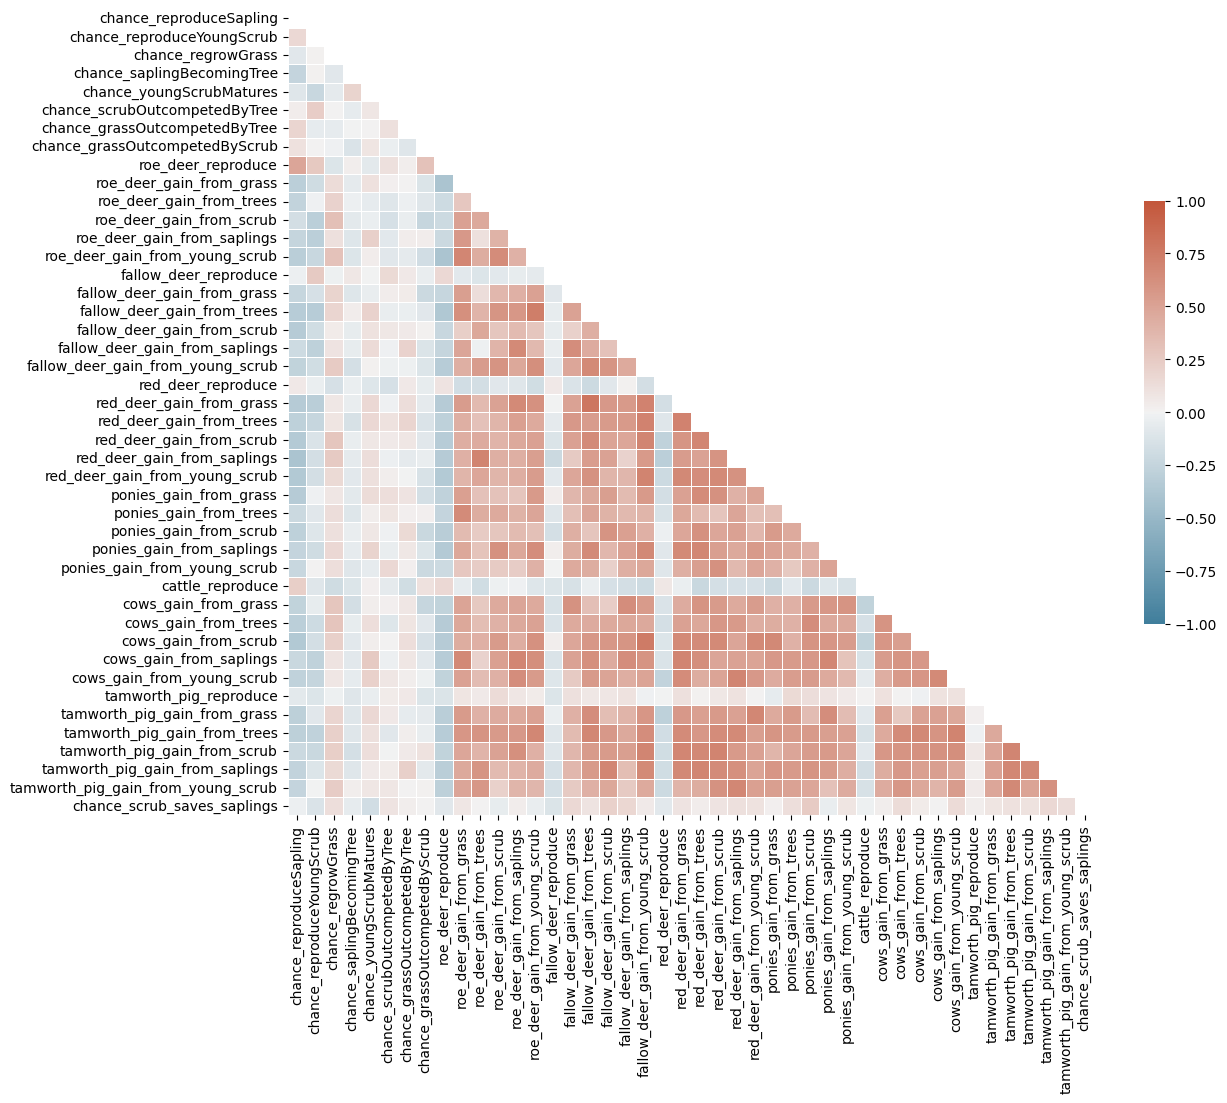

In [9]:
corr = accepted_params.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_37413/2554904913.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  accepted_params.hist(ax=axis)


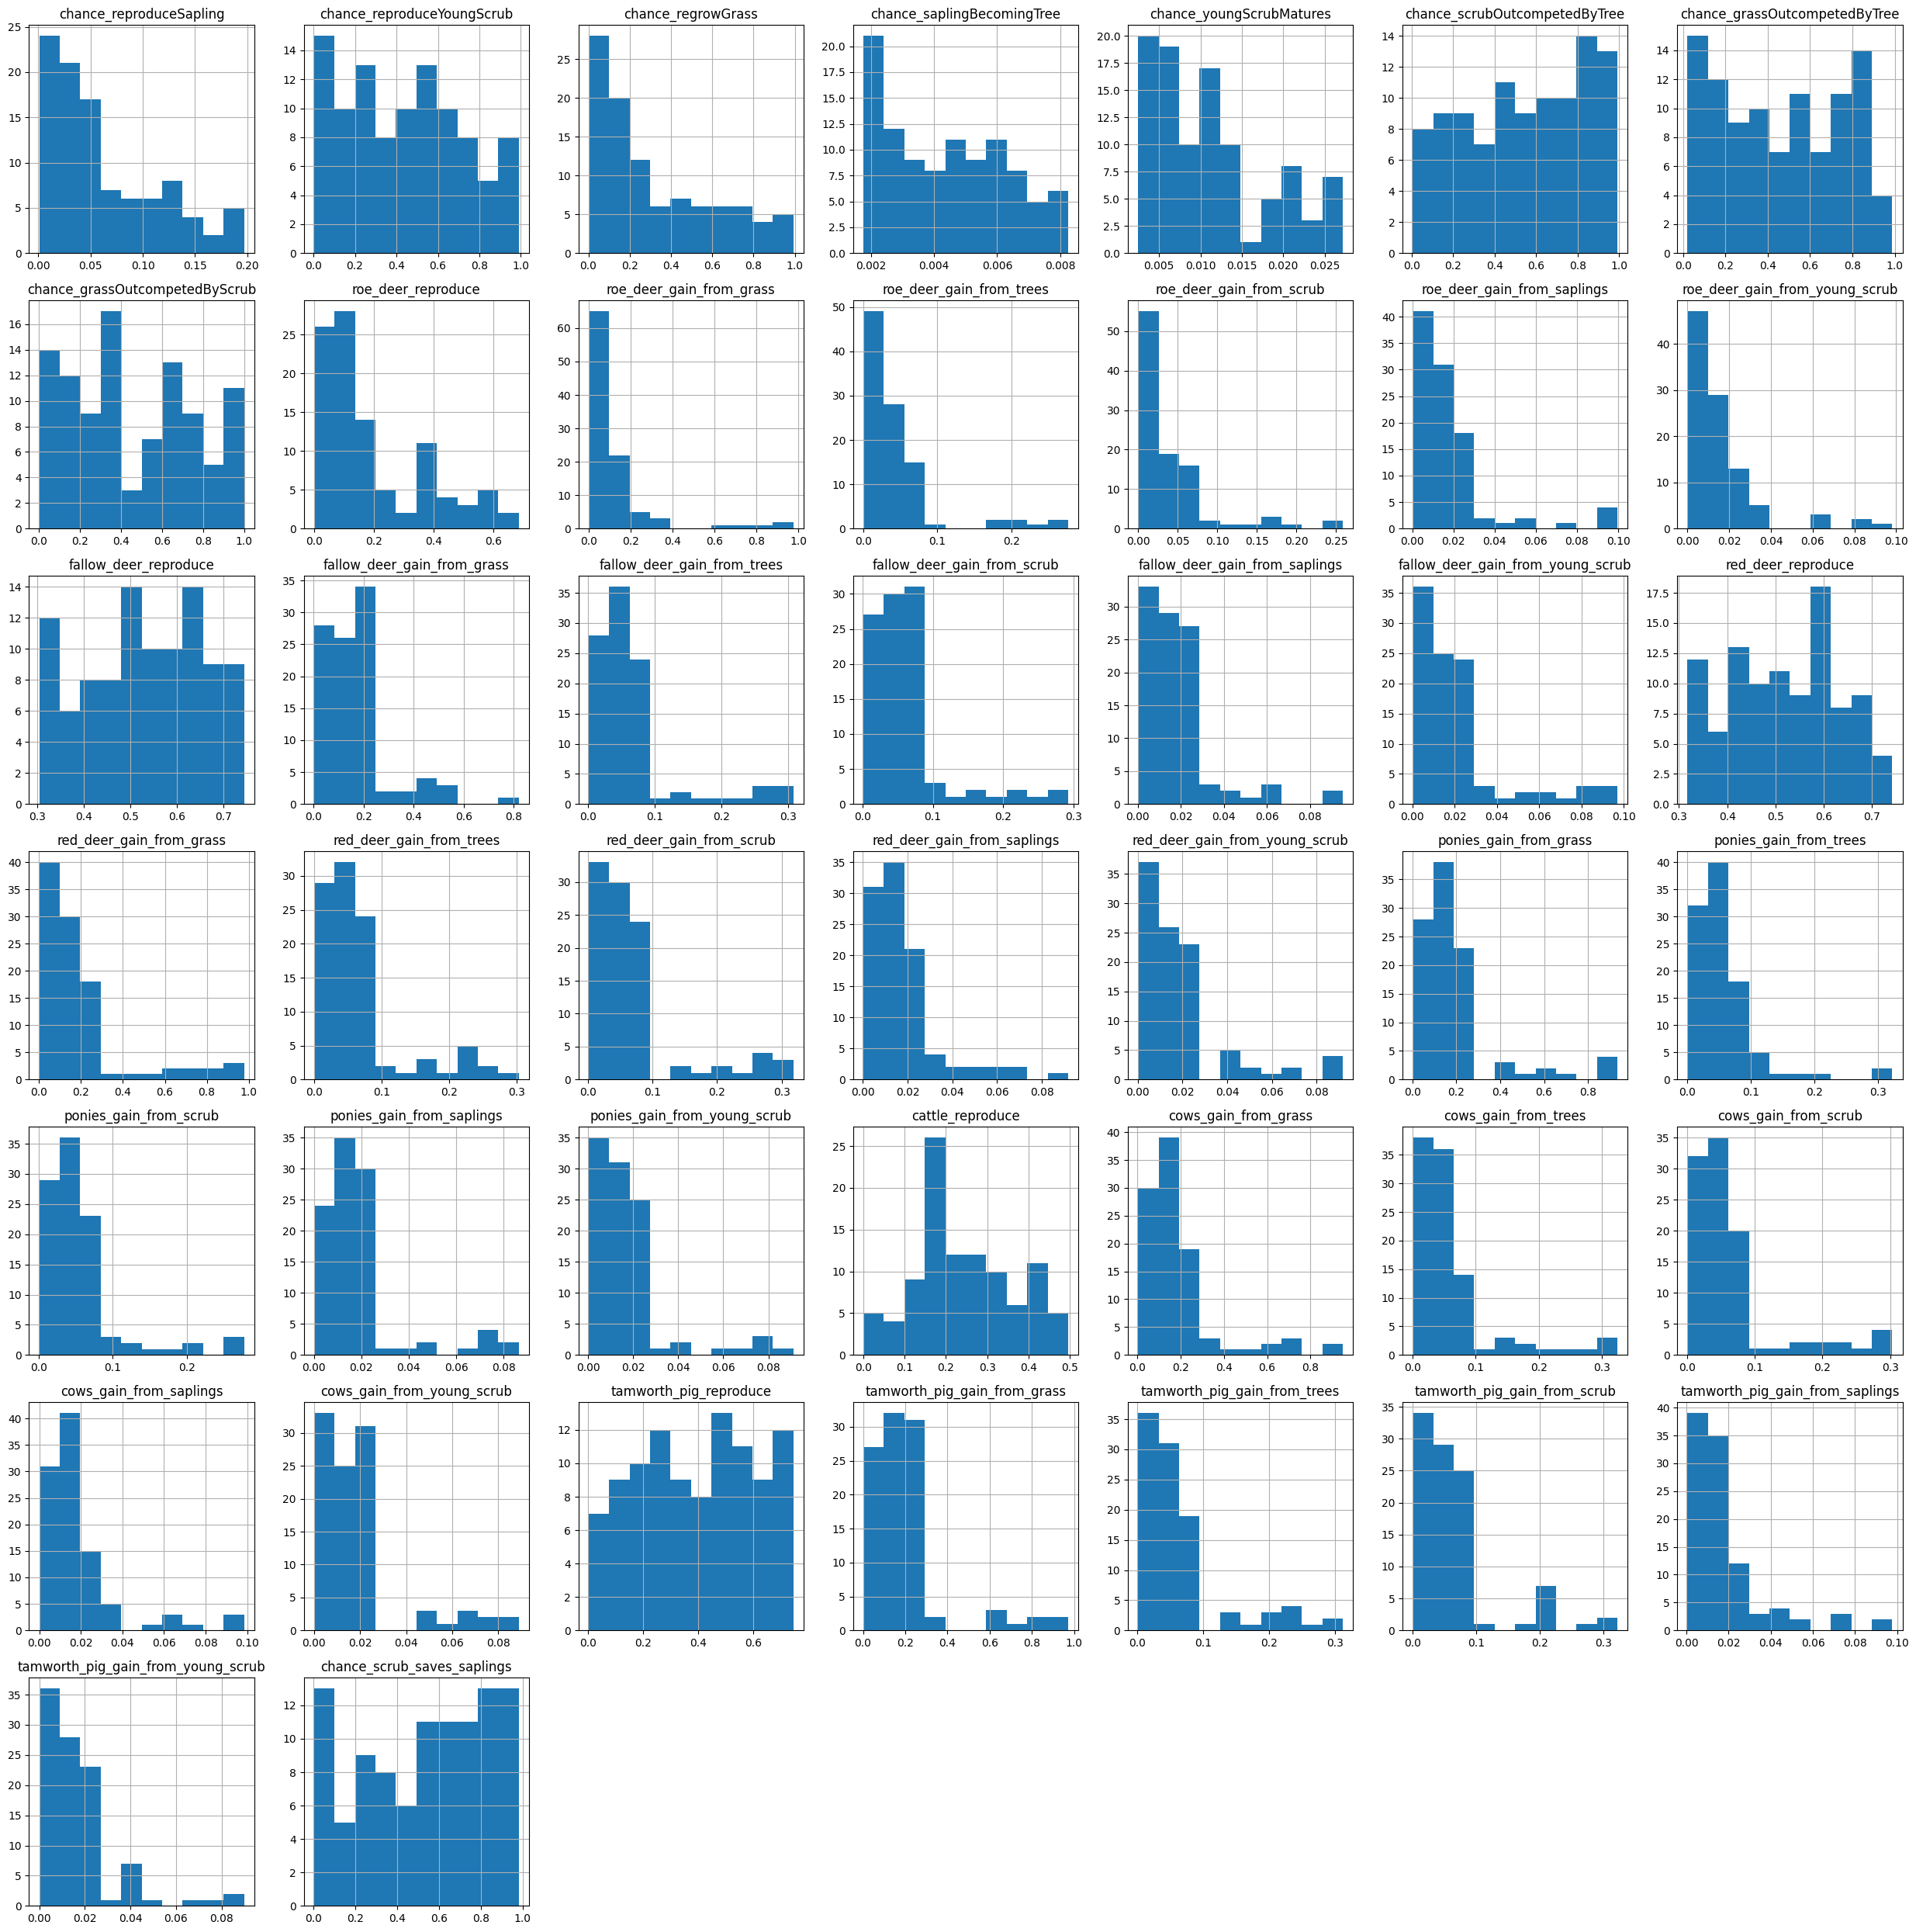

In [10]:
# show where the best fit params are in the histograms
fig, axis = plt.subplots(figsize=(25, 25))
# accepted_params.hist(ax=axis, range=[0,1]) # no ranges specified
accepted_params.hist(ax=axis)

fig.tight_layout() 

## What is the landscape of the top 100 runs (same initial conditions)?

In [20]:
all_runs = pd.read_csv('abm_final_results_all_GA_outputs_combined.csv').drop(['Unnamed: 0'], axis=1)

In [102]:
final_df = {}

for my_run in all_runs.run_number.unique():

    my_df = all_runs.loc[all_runs["run_number"] == my_run]

    habs_only = my_df[['Time', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground', 'Roe deer', 'run_number']]

    initial = habs_only.loc[habs_only["Time"] == 1]
    end = habs_only.loc[habs_only["Time"] == 5999]
       
    # then append outputs
    final_df[my_run] = {"Grassland Initial": initial["Grassland"].item(), "Grassland End": end['Grassland'].item(), 
                            "Woodland Initial": initial["Woodland"].item(), "Woodland End":  end['Woodland'].item(), 
                            "Thorny Scrub Initial": initial["Thorny Scrub"].item(), "Thorny Scrub End":  end['Thorny Scrub'].item(), 
                            "Run Number": my_run
    }


df = pd.DataFrame.from_dict(final_df, "index")

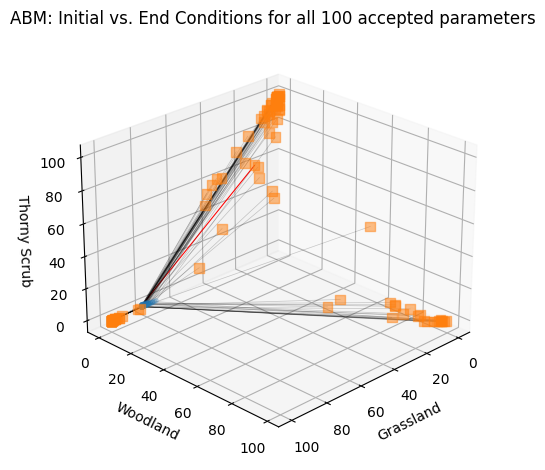

In [115]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i+1] == 1.0:  # Selecting run number 1
        ax.plot([df['Grassland Initial'][i+1], df['Grassland End'][i+1]],
                [df['Woodland Initial'][i+1], df['Woodland End'][i+1]],
                [df['Thorny Scrub Initial'][i+1], df['Thorny Scrub End'][i+1]], c='red', linewidth=0.75)
    else:
        ax.plot([df['Grassland Initial'][i+1], df['Grassland End'][i+1]],
                [df['Woodland Initial'][i+1], df['Woodland End'][i+1]],
                [df['Thorny Scrub Initial'][i+1], df['Thorny Scrub End'][i+1]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# rotate view
ax.view_init(25, 45)

plt.title('ABM: Initial vs. End Conditions for all 100 accepted parameters')

plt.tight_layout()

# Show the plot
plt.show()

## Landscape graph

In [12]:
# open the file
df = pd.read_csv('resilience_landscape.csv').drop(['Unnamed: 0'], axis=1)

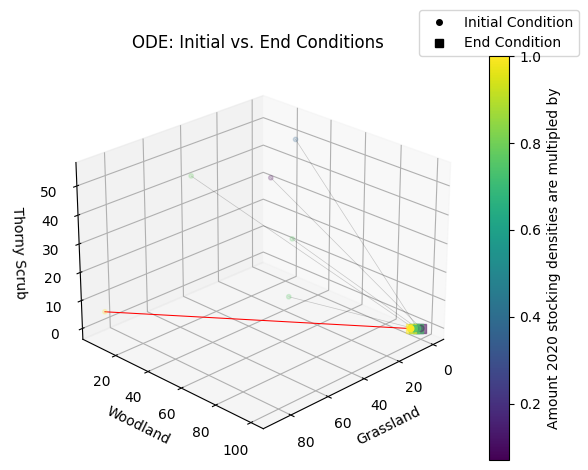

In [13]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],c=df['Stocking Density'], cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 1
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.75)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# Add legend for initial and end conditions
legend_handles = [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=6, label='End Condition')]

ax.legend(handles=legend_handles, loc=[0.9,1])

cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ODE: Initial vs. End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

## No initial conditions

In [ ]:
# now look at only end conditions and add labels 
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ODE End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

## Best run only